In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize, fsolve
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [32]:
def NSW(xs):
    return -np.prod(xs*np.array([1,2,400]))

In [33]:
xs = np.array([1/3, 1/3, 1/3])
NSW(xs)

-29.629629629629623

In [34]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

In [35]:
res = minimize(NSW, start_pos, method='SLSQP', bounds=bnds ,constraints=cons)
res

     fun: -29.629629627978957
     jac: array([-88.8881228 , -88.88927197, -88.88927197])
 message: 'Optimization terminated successfully'
    nfev: 26
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.33333621, 0.3333319 , 0.3333319 ])

In [7]:
alpha = 2
def F(x):
    costs = [1., 2., 3.]
    vals  = np.array([costs[i]*np.power(x[i], 1+1/alpha) for i in range(len(costs))])
    return np.sum(vals/(1+1/alpha))

In [8]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds ,constraints=cons, tol=1e-16)
res

     fun: 0.5714285714285716
     jac: array([0.85714287, 0.85714287, 0.85714287])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.73469389, 0.18367347, 0.08163265])

In [9]:
def theos(costs):
    den = np.sum([np.power(costs[i], -alpha) for i in range(len(costs))])
    return [np.power(costs[i], -alpha) / den for i in range(len(costs))]

In [10]:
theos([1.,2.,3.])

[0.7346938775510203, 0.18367346938775508, 0.08163265306122448]

# normal tullock

In [15]:
alpha = 2
def F(x):
    vs    = [1., 2., 3.]
    vals  = np.array([np.power(x[i], 1+1/alpha)/vs[i] for i in range(len(vs))])
    return np.sum(vals)

In [16]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds ,constraints=cons, tol=1e-16)
res

     fun: 0.2672612419124245
     jac: array([0.40089187, 0.40089186, 0.40089187])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.07142856, 0.28571428, 0.64285716])

In [17]:
def theos(vals):
    den = np.sum([np.power(vals[i], alpha) for i in range(len(vals))])
    return [np.power(vals[i], alpha) / den for i in range(len(vals))]

In [18]:
theos([1.,2.,3.])

[0.07142857142857142, 0.2857142857142857, 0.6428571428571429]

In [158]:
# other direction

In [19]:
alpha = 2
def F(x):
    vs    = [1., 2., 3.]
    vals  = np.array([np.power(x[i], 1-1/alpha)*vs[i] for i in range(len(vs))])
    return -np.sum(vals)

In [20]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds ,constraints=cons, tol=1e-16)
res

     fun: -3.7416573867739413
     jac: array([-1.87082866, -1.87082866, -1.87082866])
 message: 'Optimization terminated successfully'
    nfev: 176
     nit: 39
    njev: 39
  status: 0
 success: True
       x: array([0.07142857, 0.28571428, 0.64285715])

In [21]:
def theos(vals):
    den = np.sum([np.power(vals[i], alpha) for i in range(len(vals))])
    return [np.power(vals[i], alpha) / den for i in range(len(vals))]

In [22]:
theos([1.,2.,3.])

[0.07142857142857142, 0.2857142857142857, 0.6428571428571429]

In [158]:
# v_i^a

In [182]:
alpha = 2
def F(x):
    vs    = [1., 2., 3.]
    vals  = np.array([np.power(vs[i], alpha)*x[i] for i in range(len(vs))])
    return -np.sum(vals)

In [183]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds ,constraints=cons, tol=1e-16)
res

     fun: 1.000000000000015
     jac: array([0.99999999, 4.        , 9.        ])
 message: 'Positive directional derivative for linesearch'
    nfev: 64
     nit: 10
    njev: 6
  status: 8
 success: False
       x: array([1.00000000e+00, 3.78882784e-15, 0.00000000e+00])

In [177]:
def theos(vals):
    den = np.sum([np.power(vals[i], alpha) for i in range(len(vals))])
    return [np.power(vals[i], alpha) / den for i in range(len(vals))]

In [178]:
theos([1.,2.,3.])

[0.16653664532144477, 0.33330423948674176, 0.5001591151918134]

# Proportional

In [28]:
def F(x):
    vs    = [1., 2., 4.]
    vals  = np.array([np.log(x[i])*vs[i] for i in range(len(vs))])
    return -np.sum(vals)

In [29]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-16)
res

     fun: 6.68989923778774
     jac: array([-6.99999988, -6.99999976, -6.99999988])
 message: 'Optimization terminated successfully'
    nfev: 73
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.14285714, 0.28571429, 0.57142857])

In [30]:
1/7, 2/7, 4/7

(0.14285714285714285, 0.2857142857142857, 0.5714285714285714)

# WTA

In [36]:
def F(x):
    vs    = [1., 2., 4.]
    return -np.dot(x,vs)

In [37]:
start_pos = [0.8, 0.1, 0.1]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-16)
res

     fun: -4.0
     jac: array([-1., -2., -4.])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 6
    njev: 2
  status: 0
 success: True
       x: array([0., 0., 1.])

# reverse tullock n=2

In [38]:
alpha = 2
def F(x):
    costs = [1., 2.]
    vals  = np.array([costs[i]*np.power(x[i], 1+1/alpha) for i in range(len(costs))])
    return np.sum(vals/(1+1/alpha))

In [39]:
start_pos = [0.8, 0.2]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in start_pos)

res = minimize(F, start_pos, method='SLSQP', bounds=bnds ,constraints=cons, tol=1e-16)
res

     fun: 0.5962847939999439
     jac: array([0.8944272, 0.8944272])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.80000001, 0.19999999])

In [40]:
def theos(costs):
    den = np.sum([np.power(costs[i], -alpha) for i in range(len(costs))])
    return [np.power(costs[i], -alpha) / den for i in range(len(costs))]

In [42]:
theos([1.,2.])

[0.8, 0.2]

# new benchmark, n=2, c0 = 1, c1 = VAR, a=3

In [109]:
alpha = 3.
c1s   = np.arange(1, 5, 0.1)
c1s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [110]:
def F(c, x):
    vals  = np.array([c[i]*np.power(x[i], 1+1/alpha) for i in range(len(costs))])
    return np.sum(vals)

In [101]:
def theos(costs):
    den = np.sum([np.power(costs[i], -alpha) for i in range(len(costs))])
    return [np.power(costs[i], -alpha) / den for i in range(len(costs))]

In [102]:
fStars = []
for c1 in c1s:
    costs  = [1, c1]
    xStars = theos(costs)
    fStars.append(F(costs, xStars))
fStars = np.asarray(fStars)
fStars.shape

(40,)

In [103]:
def getEquilBids(cs, a, guess=None):
    n = len(cs)
    bs = [sp.Symbol('b{}'.format(i)) for i in range(n)]
    
    denom = sum([bi**(-a) for bi in bs])
    xs    = [bi**(-a)/denom for bi in bs]
    us    = [(bs[i] - cs[i])*xs[i] for i in range(n)]
    diffs = [sp.diff(us[i], bs[i]) for i in range(n)]
    funcs = [sp.lambdify(bs, diffs[i]) for i in range(n)]
    
    def eqs(bs):
        return [f(*bs) for f in funcs]
    
    initial_guess = cs
    if guess != None:
        initial_guess = guess
    
    return fsolve(eqs, initial_guess)

def getAllos(bids, a):
    denom = sum([b**(-a) for b in bids])
    return np.array(bids**(-a)) / denom

In [104]:
c1s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [105]:
guesses = c1s

In [98]:
# f tildes
fTildes = []
for i in range(len(c1s)):
    curCost = [1,c1s[i]]
    bids  = getEquilBids(curCost, a=alpha, guess=[guesses[i],guesses[i]])
    allos = getAllos(bids, a=alpha)
    fTildes.append(F(curCost, allos))
fTildes = np.asarray(fTildes)
fTildes.shape

(40,)

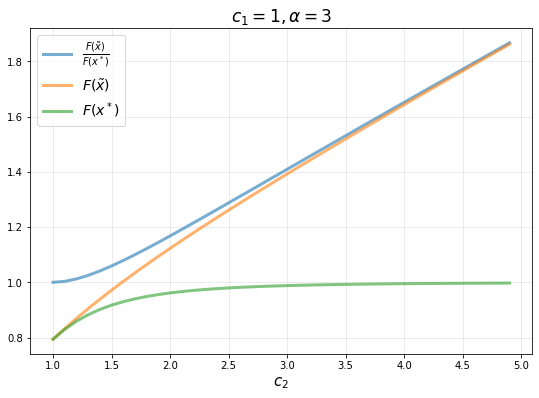

In [126]:
f, ax = plt.subplots(figsize=(9,6))

ax.plot(c1s, fTildes/fStars, linewidth=3, alpha=0.6, label=r'$\frac{F(\tilde{x})}{F(x^*)}$')
ax.plot(c1s, fTildes, linewidth=3, alpha=0.6, label=r'$F(\tilde{x})$')
ax.plot(c1s, fStars, linewidth=3, alpha=0.6, label=r'$F(x^*)$')


ax.set_xlabel(r'$c_2$', size=15)
ax.set_title(r'$c_1=1, \alpha=3$', size=17)
ax.legend(prop={'size': 14})
ax.grid(alpha=0.3)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

In [138]:
PoAs    = []
xTildes = [] 
xStars  = []
alpha = 3.

for c1 in c1s:
    costs   = [1, c1]
    xStar   = theos(costs)
    bids    = getEquilBids(costs, a=alpha, guess=[guesses[i],guesses[i]])
    xTilde  = getAllos(bids, a=alpha)
    
    xTildes.append(xTilde)
    xStars.append(xStar)
    PoAs.append(np.dot(xTilde, costs)/np.dot(xStar, costs))
xTildes = np.asarray(xTildes)
xStars = np.asarray(xStars)
PoAs = np.asarray(PoAs)

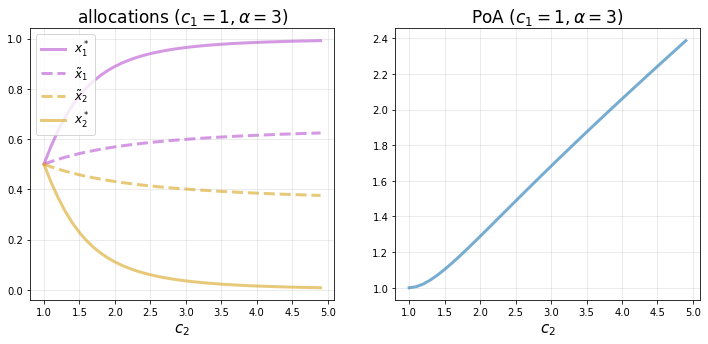

In [157]:
f, axarr = plt.subplots(ncols=2, figsize=(12,5))

axarr[0].plot(c1s, xStars[:,0], linewidth=3, alpha=0.6, label=r'$x_1^*$', color='mediumorchid',
              linestyle='-')
axarr[0].plot(c1s, xTildes[:,0], linewidth=3, alpha=0.6, label=r'$\tilde{x}_1$', color='mediumorchid',
              linestyle='--')
axarr[0].plot(c1s, xTildes[:,1], linewidth=3, alpha=0.6, label=r'$\tilde{x}_2$', color='goldenrod',
              linestyle='--')
axarr[0].plot(c1s, xStars[:,1], linewidth=3, alpha=0.6, label=r'$x_2^*$', color='goldenrod',
              linestyle='-')


axarr[1].plot(c1s, PoAs, linewidth=3, alpha=0.6, label=r'$PoA$')


axarr[0].legend(prop={'size': 12})
for ax in axarr:
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_2$', size=15)
axarr[0].set_title(r'allocations $(c_1=1, \alpha=3)$', size=17)
axarr[1].set_title(r'PoA $(c_1=1, \alpha=3)$', size=17)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# F stars

In [159]:
alpha = 3.
c1s   = np.arange(1, 5, 0.1)
c1s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [160]:
def F(c, x):
    vals  = np.array([c[i]*np.power(x[i], 1+1/alpha) for i in range(len(costs))])
    return np.sum(vals)

In [164]:
def F1(c, x):
    return c * np.power(x, 1+1/alpha)

In [101]:
def theos(costs):
    den = np.sum([np.power(costs[i], -alpha) for i in range(len(costs))])
    return [np.power(costs[i], -alpha) / den for i in range(len(costs))]

In [167]:
xStars = []
fStars = []
f1s    = []
f2s    = []
for c1 in c1s:
    costs  = [1, c1]
    xStar = theos(costs)
    xStars.append(xStar)
    fStars.append(F(costs, xStar))
    f1s.append(F1(costs[0], xStar[0]))
    f2s.append(F1(costs[1], xStar[1]))
fStars = np.asarray(fStars)
xStars = np.asarray(xStars)
f1s, f2s = np.asarray(f1s), np.asarray(f2s)
fStars.shape, xStars.shape

((40,), (40, 2))

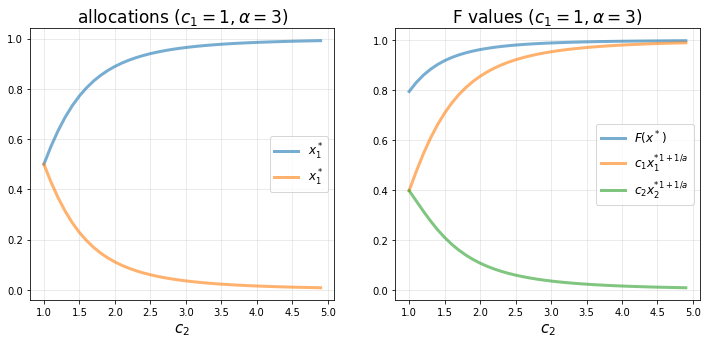

In [174]:
f, axarr = plt.subplots(ncols=2, figsize=(12,5))

axarr[0].plot(c1s, xStars[:,0], linewidth=3, alpha=0.6, label=r'$x^*_1$')
axarr[0].plot(c1s, xStars[:,1], linewidth=3, alpha=0.6, label=r'$x^*_1$')
axarr[1].plot(c1s, fStars, linewidth=3, alpha=0.6, label=r'$F(x^*)$')
axarr[1].plot(c1s, f1s, linewidth=3, alpha=0.6, label=r'$c_1x_1^{*1+1/a}$')
axarr[1].plot(c1s, f2s, linewidth=3, alpha=0.6, label=r'$c_2x_2^{*1+1/a}$')

for ax in axarr:
    ax.legend(prop={'size': 12})
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_2$', size=15)
axarr[0].set_title(r'allocations $(c_1=1, \alpha=3)$', size=17)
axarr[1].set_title(r'F values $(c_1=1, \alpha=3)$', size=17)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# F tildes

In [182]:
alpha = 3.
c1s   = np.arange(1, 10, 0.1)
c1s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [183]:
def F(c, x):
    vals  = np.array([c[i]*np.power(x[i], 1+1/alpha) for i in range(len(costs))])
    return np.sum(vals)

In [184]:
def F1(c, x):
    return c * np.power(x, 1+1/alpha)

In [186]:
xTildes = []
fTildes = []
f1s     = []
f2s     = []
for c1 in c1s:
    costs   = [1, c1]
    bids    = getEquilBids(costs, a=alpha, guess=[guesses[i],guesses[i]])
    xTilde  = getAllos(bids, a=alpha)

    xTildes.append(xTilde)
    fTildes.append(F(costs, xTilde))
    f1s.append(F1(costs[0], xTilde[0]))
    f2s.append(F1(costs[1], xTilde[1]))
fTildes = np.asarray(fTildes)
xTildes = np.asarray(xTildes)
f1s, f2s = np.asarray(f1s), np.asarray(f2s)
fTildes.shape, xTildes.shape

((90,), (90, 2))

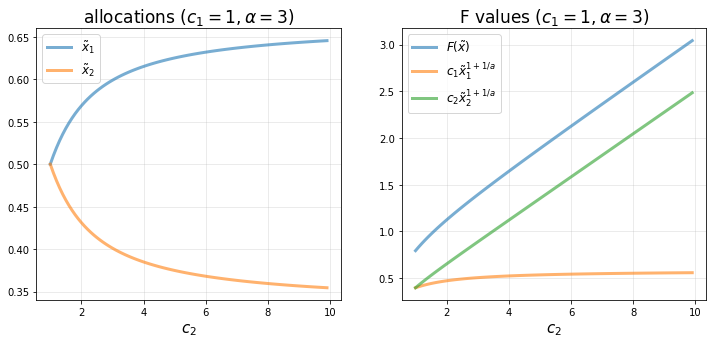

In [190]:
f, axarr = plt.subplots(ncols=2, figsize=(12,5))

axarr[0].plot(c1s, xTildes[:,0], linewidth=3, alpha=0.6, label=r'$\tilde{x}_1$')
axarr[0].plot(c1s, xTildes[:,1], linewidth=3, alpha=0.6, label=r'$\tilde{x}_2$')
axarr[1].plot(c1s, fTildes, linewidth=3, alpha=0.6, label=r'$F(\tilde{x})$')
axarr[1].plot(c1s, f1s, linewidth=3, alpha=0.6, label=r'$c_1\tilde{x}_1^{1+1/a}$')
axarr[1].plot(c1s, f2s, linewidth=3, alpha=0.6, label=r'$c_2\tilde{x}_2^{1+1/a}$')

for ax in axarr:
    ax.legend(prop={'size': 12})
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_2$', size=15)
axarr[0].set_title(r'allocations $(c_1=1, \alpha=3)$', size=17)
axarr[1].set_title(r'F values $(c_1=1, \alpha=3)$', size=17)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()